### Scopo del notebook:
In questo notebook verrà aumentato il numero di porzioni di foto degli elementi scarti. Anziché dividere la foto in n porzioni, verrà considerata una finestra m*m e fatta scorrere. Considerando anche le maschere create per decidere se può essere una porzione scarta o meno.

In [1]:
import cv2
import numpy as np
import glob
import math
from matplotlib import pyplot as plt

In [45]:
def cutWorkSpace(img,border): 
    # dimensioni immagini
    img_h = 2048
    img_l = 2048
    # offset per posizionamento su area d'indagine
    offset_x = 600
    offset_y = 800
    
    #taglio per garantire la ricerca sull'area di interesse, evitando rumori dati dallo sfondo
    crop_img = img[offset_y:img_h-offset_y, offset_x:img_l-offset_x]
    
    # Convert the img to grayscale
    gray = cv2.cvtColor(crop_img,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    high_thresh, thresh_im = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #cv2.imwrite('provaT.jpg', thresh_im)
    lowThresh = 0.5*high_thresh
    
    
    # Apply edge detection method on the image
    #edges = cv2.Canny(blurred,20,150,apertureSize = 3)
    edges = cv2.Canny(blurred,30,120,apertureSize = 3)
    #plt.imshow(edges)
    #plt.show()
    #cv2.imwrite('results_img/'+str(count_img)+'ed.jpg', edges)
    #cv2.imwrite('canny.jpg', edges)
    # This returns an array of r and theta values
    lines = cv2.HoughLines(edges,1,np.pi/180, 100)
    #cv2.imwrite('Risultati/resFS'+name+'c.jpg', edges)
    # The below for loop runs till r and theta values 
    # are in the range of the 2d array
    i = 0
    x_first = 0
    x_second = 0
    count = 0
    delta = 35
    thetaFinal = 0
    while count < 2:
        for r,theta in lines[i]:
            # Stores the value of cos(theta) in a
            a = np.cos(theta)

            # Stores the value of sin(theta) in b
            b = np.sin(theta)

            # x0 stores the value rcos(theta)
            x0 = a*r

            # y0 stores the value rsin(theta)
            y0 = b*r

            #ti define line lenght
            const = 3000
            # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
            x1 = int(x0 + const*(-b))

            # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
            y1 = int(y0 + const*(a))

            # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
            x2 = int(x0 - const*(-b))

            # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
            y2 = int(y0 - const*(a))

            if count == 0 :
                if theta != 0:
                    thetaFinal = 180-math.degrees(theta)
                x_first = x0
                #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                count += 1
            else:
                if abs(x_first-x0) > delta :
                    x_second = x0
                    #cv2.line(img,(x1+offset_x,y1+offset_y), (x2+offset_x,y2+offset_y), (0,0,255),2)
                    count += 1
            i += 1
    # All the changes made in the input image are finally
    # written on a new image houghlines.jpg
    #cv2.imwrite('Risultati/res'+name+'.jpg', img)
    (h, w) = img.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by Theta degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), -thetaFinal, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h))
    scale_percent = 100 # percent of original size

  
    if x_first < x_second:
        
        median = (x_second+x_first)//2
        temp = rotated[0:img_h-1, int(offset_x+median-border):int(offset_x+median+border)]
        width = int(temp.shape[1] * scale_percent / 100)
        height = int(temp.shape[0] * scale_percent / 100)
        dim = (width, height)
        temp = cv2.resize(temp, dim, interpolation = cv2.INTER_AREA)        
        gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
        return  gray
    else:
        median = (x_first+x_second)//2.
        temp = rotated[0:img_h-1, int(offset_x+median-border):int(offset_x+median+border)]        
        #blurred = cv2.GaussianBlur(temp, (3,3), 0)
        width = int(temp.shape[1] * scale_percent / 100)
        height = int(temp.shape[0] * scale_percent / 100)
        dim = (width, height)
        temp = cv2.resize(temp, dim, interpolation = cv2.INTER_AREA)
        gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
        return  gray
    

In [46]:
def divideImage(img,pcs):
    results = []
    lung = len(img) // pcs
    for i in range(pcs):
        results.append(img[(lung*i):(lung*(i+1)-1)][:])

    return results

1
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942052.tif


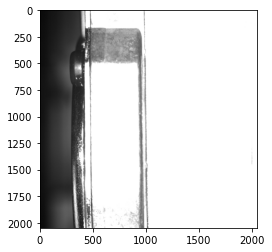

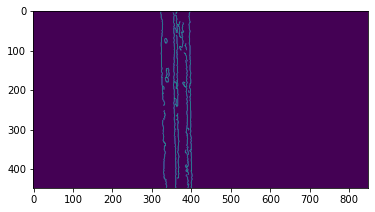

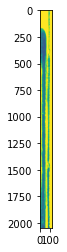

2
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942046.tif


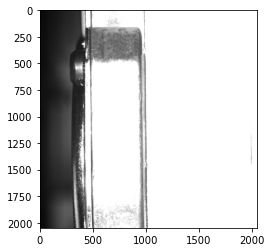

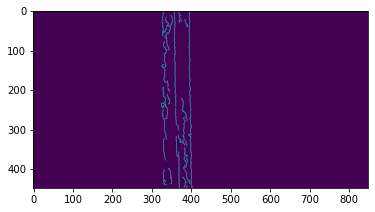

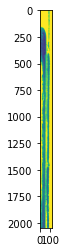

3
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891151674.tif


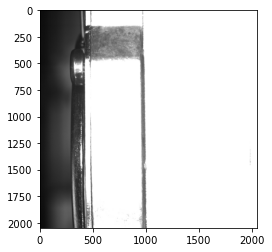

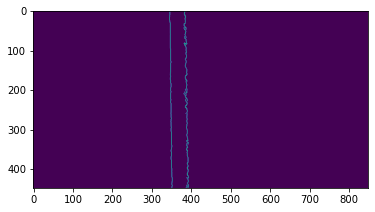

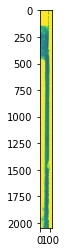

4
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/57014892861622.tif


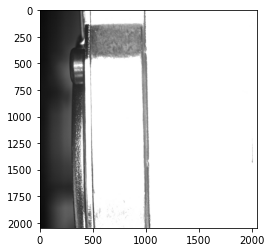

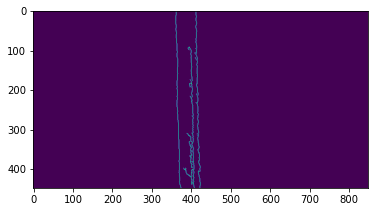

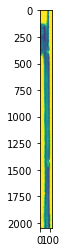

5
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114891051242.tif


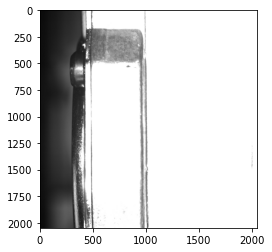

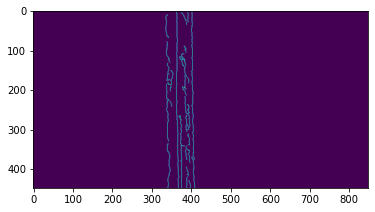

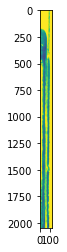

6
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943831263.tif


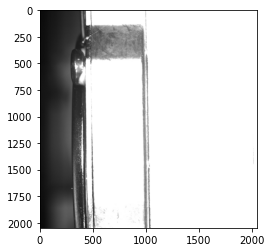

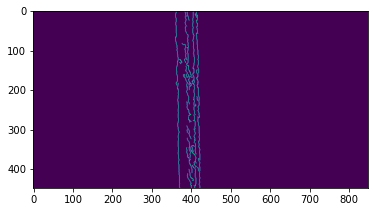

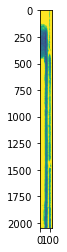

7
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830828.tif


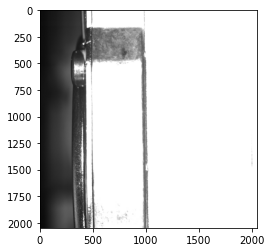

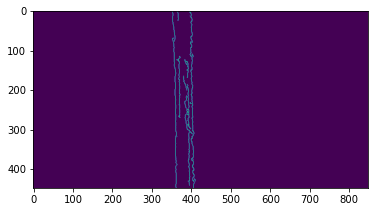

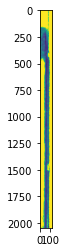

8
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830800.tif


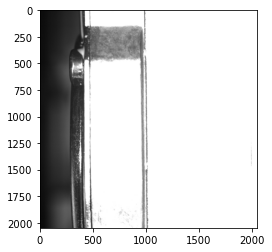

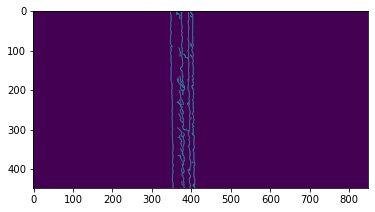

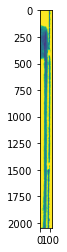

9
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830814.tif


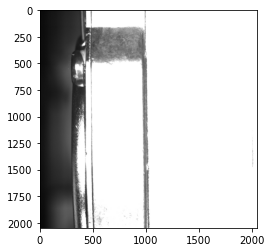

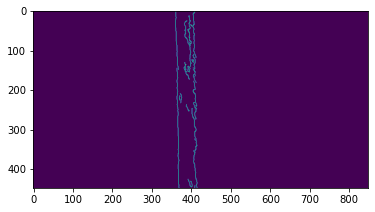

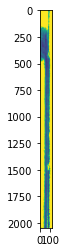

10
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114891020135.tif


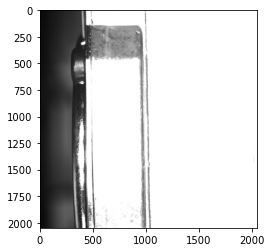

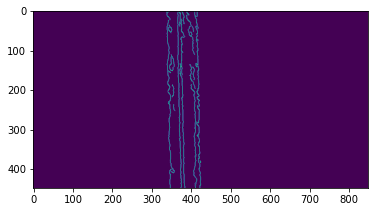

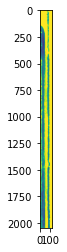

11
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942443.tif


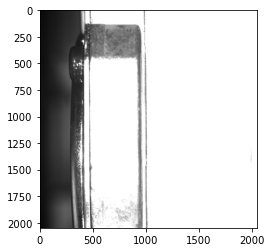

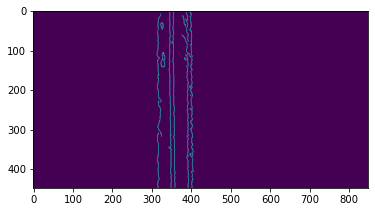

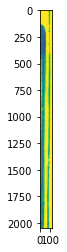

12
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830815.tif


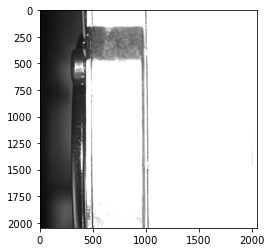

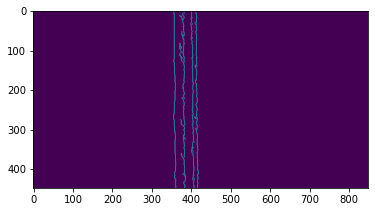

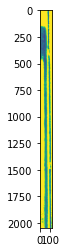

13
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830801.tif


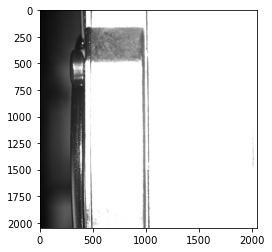

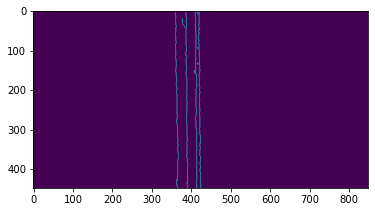

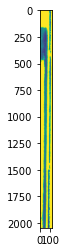

14
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830829.tif


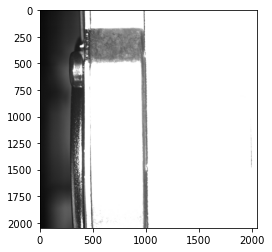

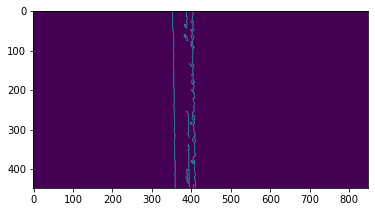

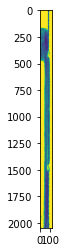

15
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114891043082.tif


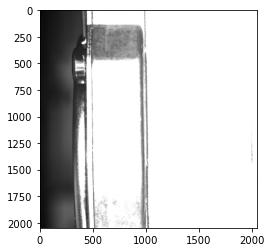

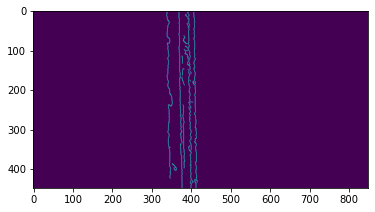

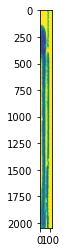

16
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891151649.tif


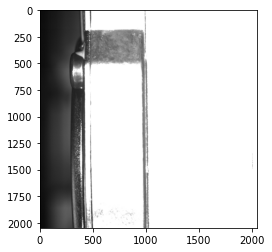

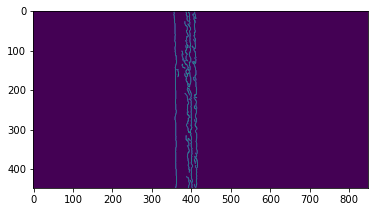

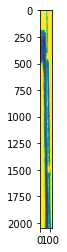

17
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830746.tif


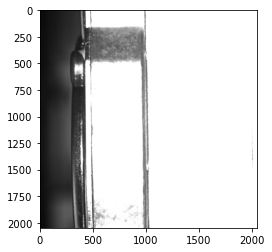

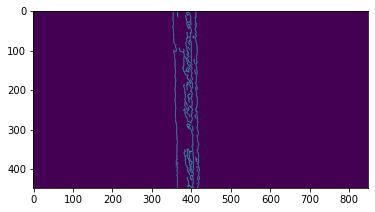

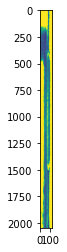

18
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830752.tif


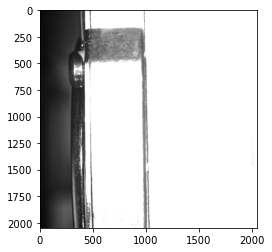

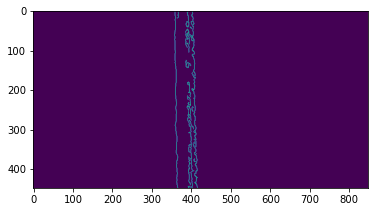

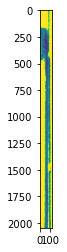

19
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891110371.tif


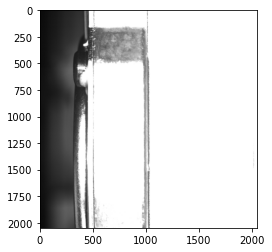

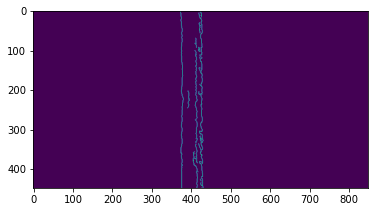

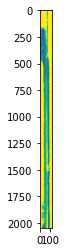

20
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891110359.tif


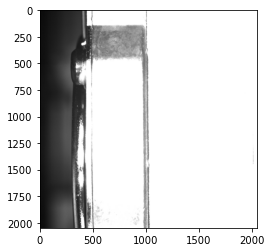

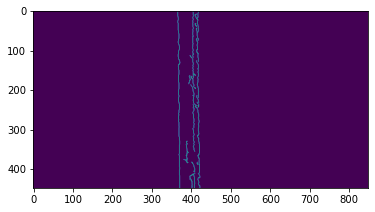

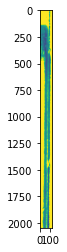

21
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874941980.tif


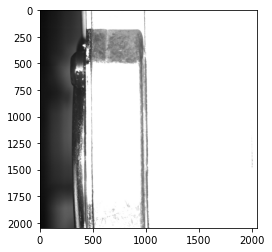

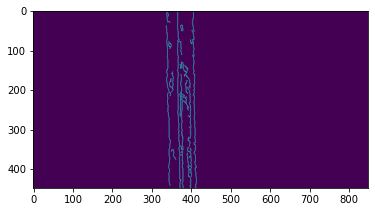

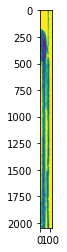

22
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874941996.tif


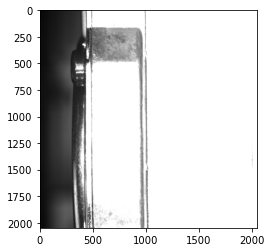

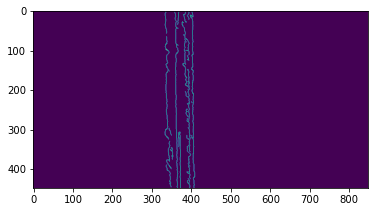

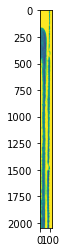

23
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874941969.tif


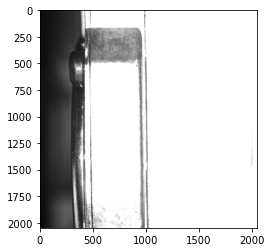

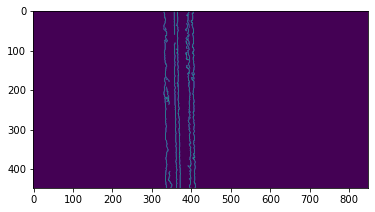

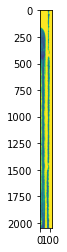

24
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830750.tif


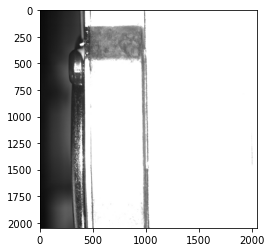

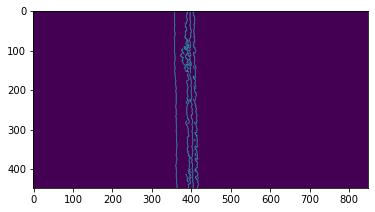

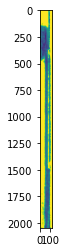

25
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942045.tif


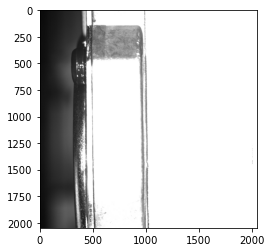

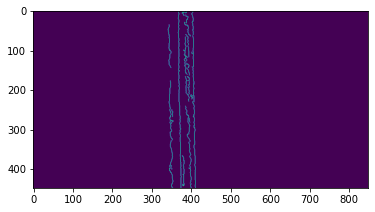

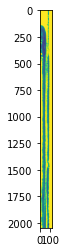

26
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942051.tif


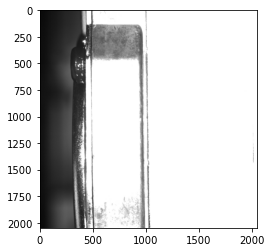

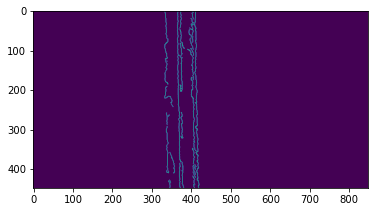

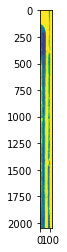

27
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891151688.tif


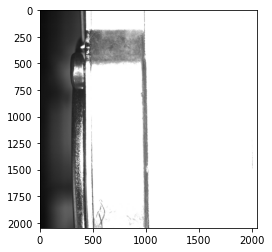

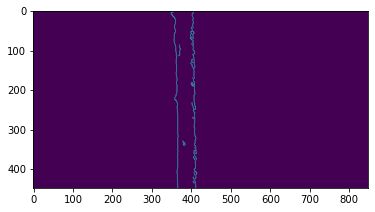

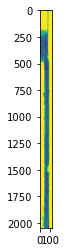

28
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/57014892691120.tif


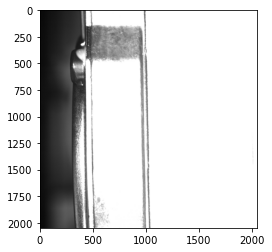

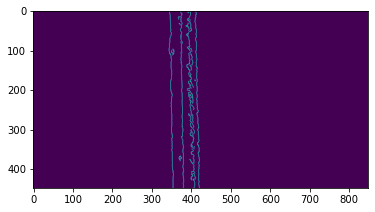

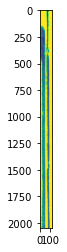

29
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891151703.tif


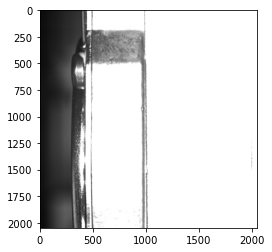

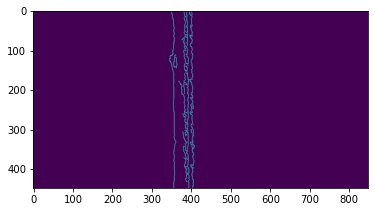

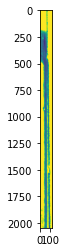

30
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942333.tif


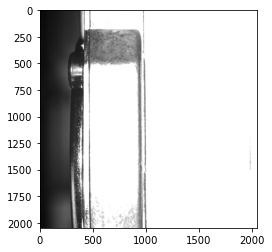

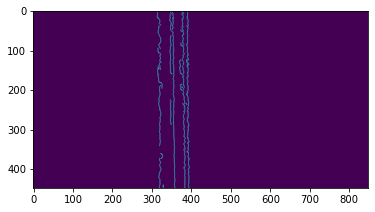

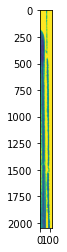

31
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891122263.tif


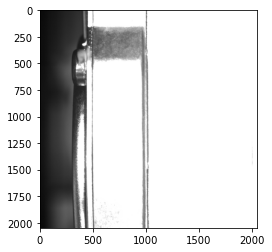

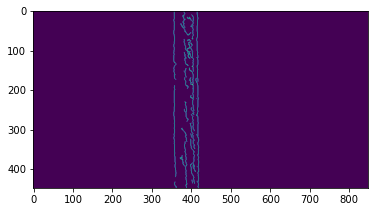

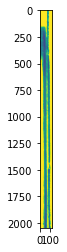

32
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830816.tif


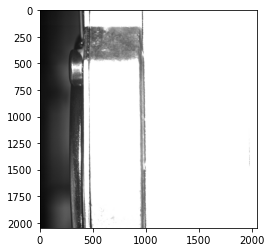

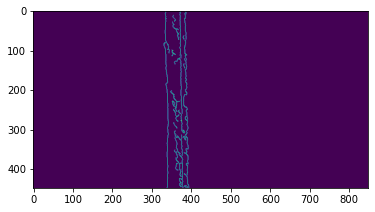

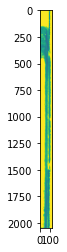

33
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114891051240.tif


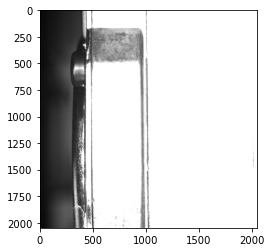

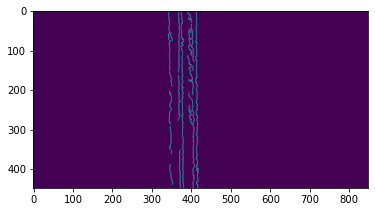

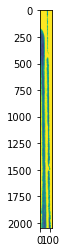

34
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891152425.tif


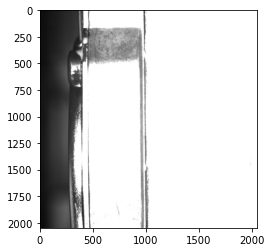

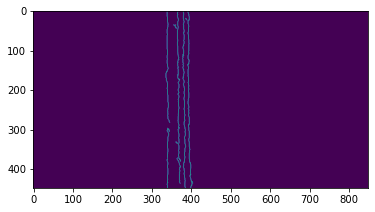

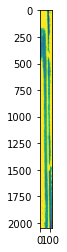

35
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891152357.tif


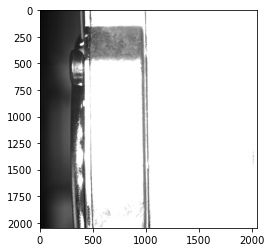

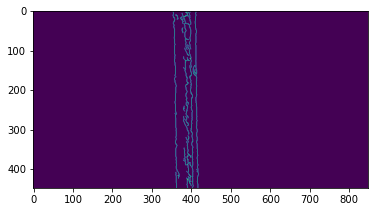

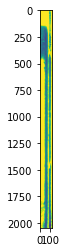

36
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891151676.tif


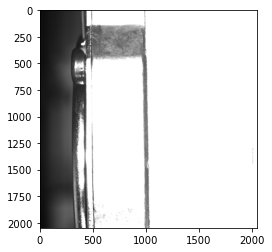

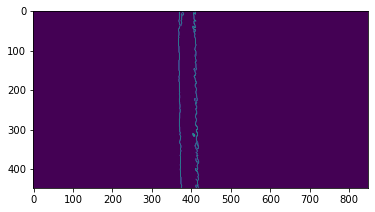

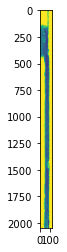

37
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874942050.tif


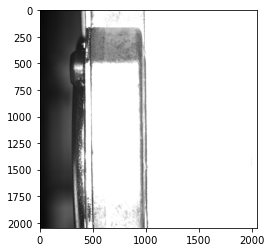

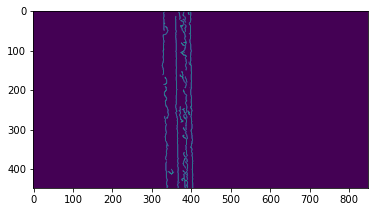

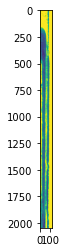

38
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891151689.tif


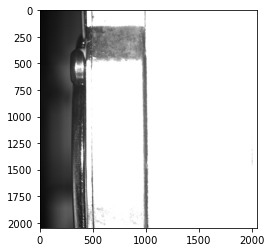

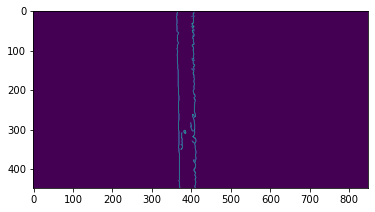

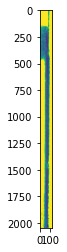

39
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891152394.tif


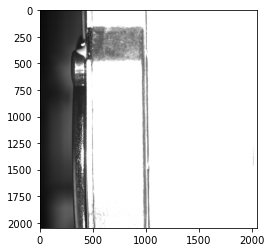

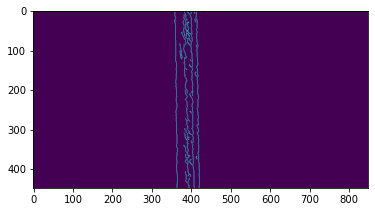

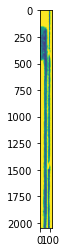

40
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830751.tif


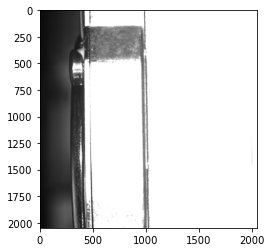

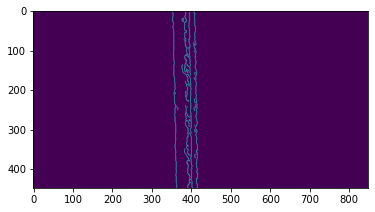

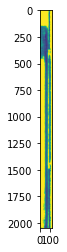

41
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914943830745.tif


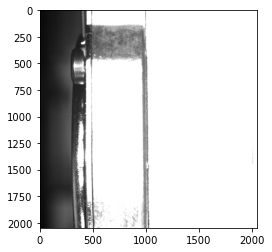

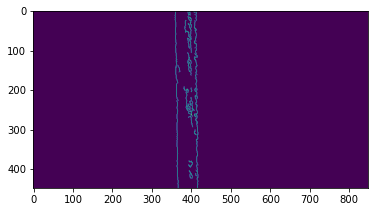

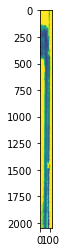

42
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891110372.tif


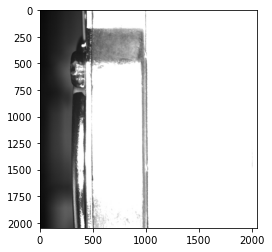

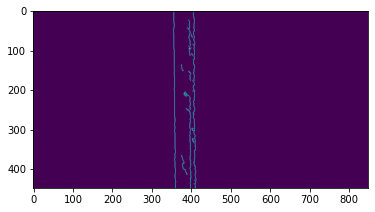

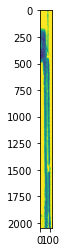

43
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/61914891110366.tif


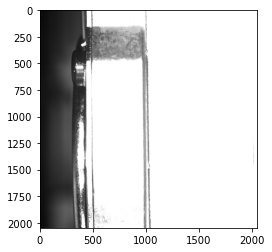

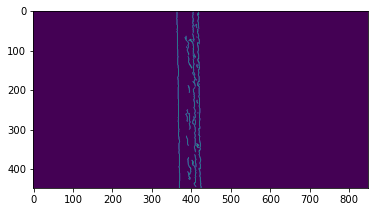

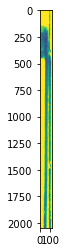

44
/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/72114874941983.tif


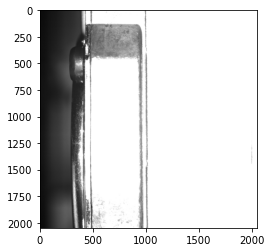

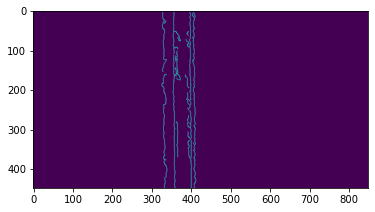

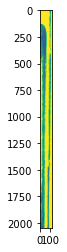

In [47]:
pathBuoni = '/Users/leonardoaggio/Desktop/Dataset/Dataset/Cam3@00004v1/*.tif'

border = 60
list_paths = glob.glob(pathBuoni) 

i = 1
for img_path in list_paths[56:100]:
    print(i)
    print(img_path)
    img = cv2.imread(img_path)
    plt.imshow(img)
    plt.show()
    temp = cutWorkSpace(img,border)
    plt.imshow(temp)
    plt.show()
    #cv2.imwrite('ImgScarte/img'+str(i)+'.jpg', temp)
    #temp2 = divideImage(temp,pezziXimmagine)
    #img_results += temp2
    j = 0
    #for im in temp2:
        #cv2.imwrite('ImgScarte/img'+str(i)+'pzs'+str(j)+'.jpg', im)
        #j += 1
    i += 1
    